# **Data Cleaning**

##**Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd

# We use pandas for data manipulation and cleaning


## **Load the Dataset**

In [ ]:
# Load the CSV dataset
df = pd.read_csv('dataset.csv')

# Display basic info to check structure and data types
df.info()

# Preview first few rows to understand the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Country_of_Origin       300000 non-null  object 
 1   Education_Level         300000 non-null  object 
 2   Field_of_Study          300000 non-null  object 
 3   Language_Proficiency    300000 non-null  object 
 4   Visa_Type               300000 non-null  object 
 5   Gender                  300000 non-null  object 
 6   University_Ranking      300000 non-null  object 
 7   Region_of_Study         300000 non-null  object 
 8   Age                     300000 non-null  int64  
 9   Years_Since_Graduation  300000 non-null  int64  
 10  GPA                     300000 non-null  float64
 11  Internship_Experience   300000 non-null  object 
 12  Employment_Status       300000 non-null  object 
 13  Salary                  300000 non-null  int64  
 14  Job_Sector          

,Country_of_Origin,Education_Level,Field_of_Study,Language_Proficiency,Visa_Type,Gender,University_Ranking,Region_of_Study,Age,Years_Since_Graduation,GPA,Internship_Experience,Employment_Status,Salary,Job_Sector
0,Vietnam,Bachelor's,IT,Fluent,Permanent Residency,Female,Low,EU,23,8,3.76,Yes,Employed,54397,Healthcare
1,Germany,Master's,Arts,Intermediate,Post-study,Male,High,UK,38,9,3.76,No,Employed,69635,Finance
2,Brazil,PhD,Engineering,Intermediate,Post-study,Male,High,Canada,23,2,3.52,Yes,Employed,96216,Finance
3,Vietnam,PhD,Health,Fluent,Post-study,Female,Medium,Australia,25,5,3.28,Yes,Employed,86076,Other
4,Nigeria,PhD,Engineering,Basic,Student,Male,High,Canada,24,2,3.01,Yes,Employed,82772,Finance


## **Check Missing Values**

In [ ]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Country_of_Origin              0
Education_Level                0
Field_of_Study                 0
Language_Proficiency           0
Visa_Type                      0
Gender                         0
University_Ranking             0
Region_of_Study                0
Age                            0
Years_Since_Graduation         0
GPA                            0
Internship_Experience          0
Employment_Status              0
Salary                         0
Job_Sector                143356
dtype: int64


## **Handle Missing Values**

In [ ]:
# Job_Sector has missing values
# Fill missing Job_Sector with 'Unknown'
df['Job_Sector'] = df['Job_Sector'].fillna('Unknown')

# Verify no more missing values
print(df['Job_Sector'].isnull().sum())


0


## **Convert Object Columns to Category**

In [ ]:
# Convert object/string columns to categorical for efficiency
categorical_cols = [
    'Country_of_Origin', 'Education_Level', 'Field_of_Study',
    'Language_Proficiency', 'Visa_Type', 'Gender',
    'University_Ranking', 'Region_of_Study',
    'Internship_Experience', 'Employment_Status', 'Job_Sector'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check data types after conversion
df.dtypes


,0
Country_of_Origin,category
Education_Level,category
Field_of_Study,category
Language_Proficiency,category
Visa_Type,category
Gender,category
University_Ranking,category
Region_of_Study,category
Age,int64
Years_Since_Graduation,int64


## **Check Numeric Columns**

In [ ]:
# List of numeric columns
numeric_cols = ['Age', 'Years_Since_Graduation', 'GPA', 'Salary']

# Display basic statistics to understand numeric data
df[numeric_cols].describe()


,Age,Years_Since_Graduation,GPA,Salary
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,30.495950,4.504150,3.200365,30333.692383
std,5.187951,2.874557,0.400285,31791.208938
min,22.000000,0.000000,1.350000,0.000000
25%,26.000000,2.000000,2.930000,0.000000
50%,30.000000,5.000000,3.200000,32296.500000
75%,35.000000,7.000000,3.470000,56634.000000
max,39.000000,9.000000,4.920000,118115.000000


## **Identify Outliers**

In [ ]:
# Check for outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} outliers: {len(outliers)}")

# Note: We will keep all outliers as-is


Age outliers: 0
Years_Since_Graduation outliers: 0
GPA outliers: 2036
Salary outliers: 0


In [ ]:
# GPA column
Q1 = df['GPA'].quantile(0.25)
Q3 = df['GPA'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"GPA lower bound: {lower_bound}")
print(f"GPA upper bound: {upper_bound}")


GPA lower bound: 2.12
GPA upper bound: 4.28


In [ ]:
# Filter rows that are GPA outliers
gpa_outliers = df[(df['GPA'] < lower_bound) | (df['GPA'] > upper_bound)]

# Show how many and the first few
print(f"Number of GPA outliers: {len(gpa_outliers)}")
gpa_outliers.head()


Number of GPA outliers: 2036


,Country_of_Origin,Education_Level,Field_of_Study,Language_Proficiency,Visa_Type,Gender,University_Ranking,Region_of_Study,Age,Years_Since_Graduation,GPA,Internship_Experience,Employment_Status,Salary,Job_Sector
25,USA,Bachelor's,Arts,Basic,Student,Female,Medium,Canada,34,8,2.03,Yes,Continuing Education,0,Unknown
26,USA,Bachelor's,Arts,Advanced,Work Visa,Male,Medium,Australia,25,9,4.30,No,Continuing Education,0,Unknown
79,Germany,PhD,Arts,Advanced,Student,Male,Medium,Australia,30,4,4.30,Yes,Employed,95067,Education
131,Brazil,Bachelor's,Social Sciences,Basic,Student,Female,High,Canada,36,8,2.07,Yes,Employed,42178,Retail
204,Germany,Bachelor's,Business,Fluent,Student,Female,High,UK,28,5,1.97,No,Unemployed,0,Unknown


In [ ]:
# Just the GPA values of the outliers
gpa_outliers['GPA'].unique()


array([2.03, 4.3 , 2.07, 1.97, 1.66, 2.09, 2.01, 4.33, 4.29, 1.91, 1.6 ,
       4.36, 4.59, 4.47, 2.06, 1.92, 1.8 , 2.1 , 4.39, 4.41, 1.9 , 1.71,
       1.99, 4.37, 4.49, 1.87, 2.05, 4.34, 2.11, 2.08, 4.35, 2.04, 1.93,
       1.68, 4.45, 4.51, 4.62, 1.96, 4.31, 1.84, 4.76, 1.76, 2.  , 1.62,
       4.58, 4.52, 1.88, 1.94, 1.78, 4.32, 4.4 , 4.56, 4.48, 4.43, 1.98,
       4.38, 4.42, 4.72, 4.53, 2.02, 1.41, 1.77, 4.63, 1.95, 4.5 , 4.44,
       4.67, 4.55, 1.79, 4.6 , 1.86, 4.61, 1.74, 4.54, 1.69, 1.89, 1.85,
       4.46, 4.74, 4.66, 1.83, 4.68, 1.49, 4.65, 1.73, 1.82, 1.81, 4.71,
       4.57, 1.59, 4.73, 4.64, 1.43, 1.7 , 4.92, 1.35, 4.79, 1.65, 1.75,
       1.63, 4.7 , 1.72, 1.39, 4.75, 1.57, 4.77, 4.69, 1.67])

*Reason for keeping GPA outliers:*
1. *They may represent real variations in the data (e.g., exceptionally high or low GPA students).*
2. *Removing them could bias analyses and distort true patterns.*
3. *Outlier detection methods (like IQR) flag unusual values but do not automatically indicate errors.*
*Therefore, we identify outliers for reporting purposes but keep them in the dataset.*


In [ ]:
# Check the overall dataset info
df.info()

# Ensure no missing values remain
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Country_of_Origin       300000 non-null  category
 1   Education_Level         300000 non-null  category
 2   Field_of_Study          300000 non-null  category
 3   Language_Proficiency    300000 non-null  category
 4   Visa_Type               300000 non-null  category
 5   Gender                  300000 non-null  category
 6   University_Ranking      300000 non-null  category
 7   Region_of_Study         300000 non-null  category
 8   Age                     300000 non-null  int64   
 9   Years_Since_Graduation  300000 non-null  int64   
 10  GPA                     300000 non-null  float64 
 11  Internship_Experience   300000 non-null  category
 12  Employment_Status       300000 non-null  category
 13  Salary                  300000 non-null  int64   
 14  Job_

In [ ]:
# Save the cleaned dataset to CSV
df.to_csv('Cleaned.csv', index=False)
print("Cleaned dataset saved as 'Cleaned.csv'")


Cleaned dataset saved as 'Cleaned.csv'


# **METHOD 1 CONTINEGENCY TABLE**


## 📊 Step 1: Choose Two Categorical Variables

## 🧮 Step 2: Create a Contingency Table

##### **A contingency table shows how many people belong to each combination of categories.**


# **🧩 Contingency Table Pairs**

##### Language_Proficiency × Employment_Status


###### *To examine whether international graduates with higher levels of language proficiency are more likely to secure employment compared to those with lower proficiency levels.*



In [ ]:
pd.crosstab(df['Language_Proficiency'], df['Employment_Status'], normalize='index') * 100


Employment_Status,Continuing Education,Employed,Unemployed
Language_Proficiency,,,
Advanced,18.831219,71.335353,9.833428
Basic,30.842838,33.319417,35.837745
Fluent,19.258455,71.021294,9.720251
Intermediate,30.674670,33.158776,36.166554


###### Education_Level × Employment_Status

###### *To determine whether the level of education (e.g., Bachelor’s, Master’s, PhD) influences the likelihood of being employed after graduation.*

In [ ]:
pd.crosstab(df['Education_Level'], df['Employment_Status'], normalize='index') * 100


Employment_Status,Continuing Education,Employed,Unemployed
Education_Level,,,
Bachelor's,30.558584,33.607451,35.833965
Diploma,30.805671,33.157631,36.036697
Master's,19.093913,71.006351,9.899736
PhD,19.206848,70.788471,10.004681


###### Internship_Experience × Employment_Status


 *To investigate whether graduates who completed internships during their studies are more likely to gain employment compared to those without internship experience.*

In [ ]:
pd.crosstab(df['Internship_Experience'], df['Employment_Status'], normalize='index') * 100


Employment_Status,Continuing Education,Employed,Unemployed
Internship_Experience,,,
No,28.409156,42.258524,29.332320
Yes,22.959786,57.598480,19.441734


##### University_Ranking × Employment_Status

*To explore whether studying at a higher-ranked university increases the probability of being employed after graduation.*

In [ ]:
pd.crosstab(df['University_Ranking'], df['Employment_Status'], normalize='index') * 100


Employment_Status,Continuing Education,Employed,Unemployed
University_Ranking,,,
High,19.720471,66.539340,13.740188
Low,27.011012,46.008192,26.980796
Medium,27.136346,46.022943,26.840711


# **Chi-square Tests**

In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Language_Proficiency'], df['Employment_Status'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 = {chi2:.3f}, p = {p:.4f}, dof = {dof}")


Chi2 = 47438.758, p = 0.0000, dof = 6


In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Education_Level'], df['Employment_Status'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 = {chi2:.3f}, p = {p:.4f}, dof = {dof}")


Chi2 = 46124.187, p = 0.0000, dof = 6


In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Internship_Experience'], df['Employment_Status'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 = {chi2:.3f}, p = {p:.4f}, dof = {dof}")


Chi2 = 6813.133, p = 0.0000, dof = 2


In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['University_Ranking'], df['Employment_Status'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 = {chi2:.3f}, p = {p:.4f}, dof = {dof}")


Chi2 = 11249.760, p = 0.0000, dof = 4


# **Cramer's V**

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# --- Define the four variable pairs ---
pairs = [
    ('Language_Proficiency', 'Employment_Status'),
    ('Education_Level', 'Employment_Status'),
    ('Internship_Experience', 'Employment_Status'),
    ('University_Ranking', 'Employment_Status')
]

# --- Function to compute Cramer's V ---
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / (min(k-1, r-1)))

# --- Run Chi-square + Cramer's V for each pair ---
results = []
for var1, var2 in pairs:
    table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(table)
    v = cramers_v(table)
    results.append({
        'Variable Pair': f'{var1} × {var2}',
        'Chi-square (χ²)': round(chi2, 3),
        'df': dof,
        'p-value': round(p, 4),
        'Cramer’s V': round(v, 3),
        'Significance': 'Significant' if p < 0.05 else 'Not Significant'
    })

# --- Display neatly ---
results_df = pd.DataFrame(results)
print(results_df)


                               Variable Pair  Chi-square (χ²)  df  p-value  \
0   Language_Proficiency × Employment_Status        47438.758   6      0.0   
1        Education_Level × Employment_Status        46124.187   6      0.0   
2  Internship_Experience × Employment_Status         6813.133   2      0.0   
3     University_Ranking × Employment_Status        11249.760   4      0.0   

   Cramer’s V Significance  
0       0.281  Significant  
1       0.277  Significant  
2       0.151  Significant  
3       0.137  Significant  


<Figure size 800x500 with 0 Axes>

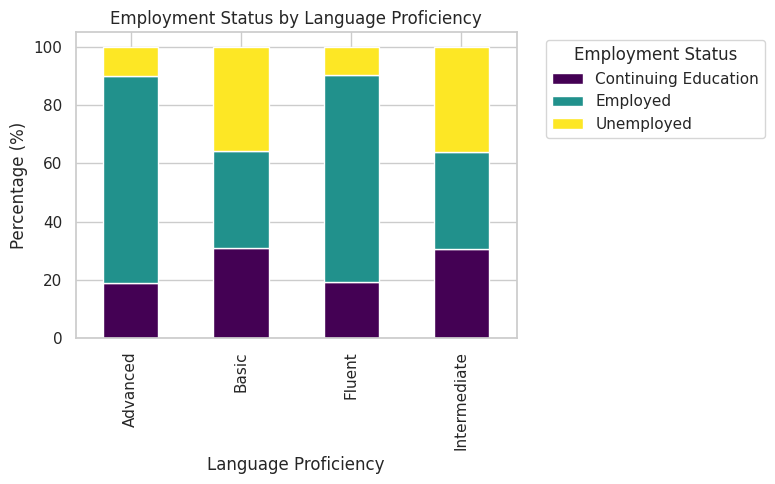

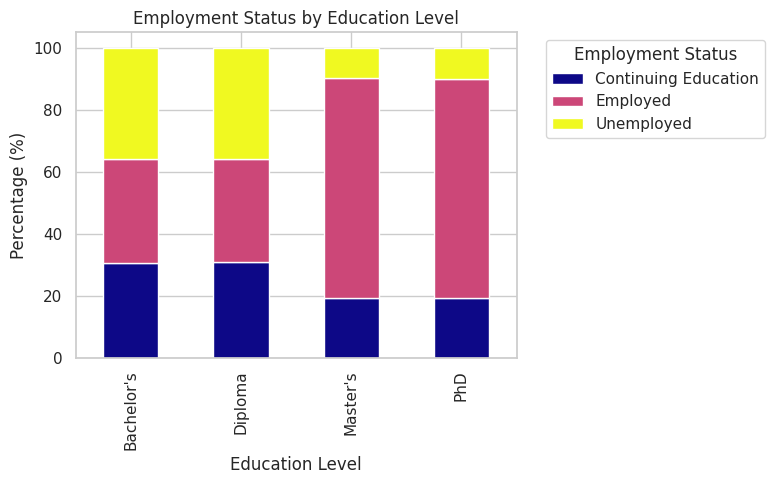

<Figure size 600x400 with 0 Axes>

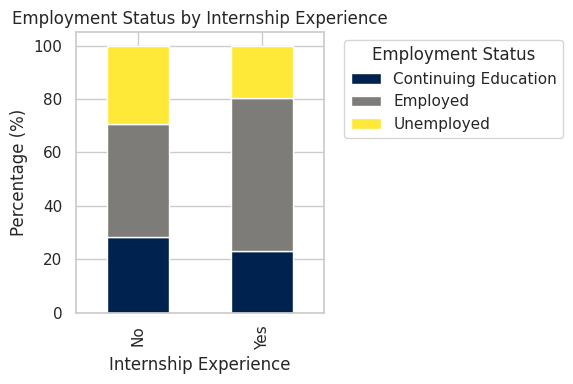

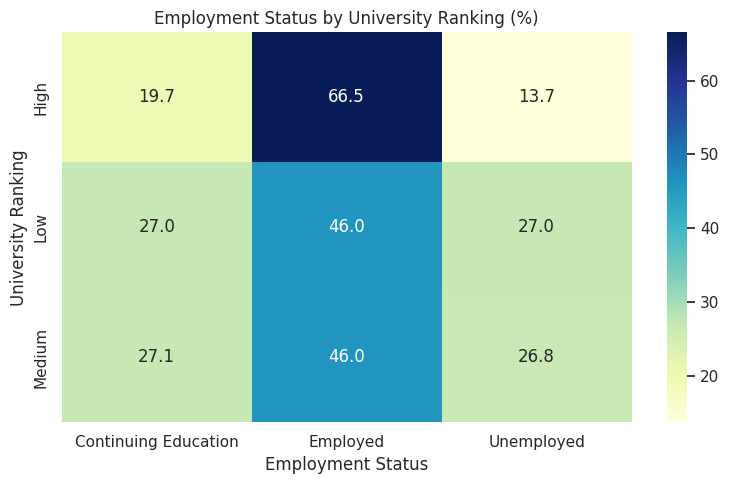

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean style
sns.set(style="whitegrid")

# 1️⃣ Language Proficiency vs Employment Status
plt.figure(figsize=(8,5))
lang_emp = pd.crosstab(df['Language_Proficiency'], df['Employment_Status'], normalize='index') * 100
lang_emp.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,5))
plt.title('Employment Status by Language Proficiency')
plt.ylabel('Percentage (%)')
plt.xlabel('Language Proficiency')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2️⃣ Education Level vs Employment Status
edu_emp = pd.crosstab(df['Education_Level'], df['Employment_Status'], normalize='index') * 100
edu_emp.plot(kind='bar', stacked=True, colormap='plasma', figsize=(8,5))
plt.title('Employment Status by Education Level')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3️⃣ Internship Experience vs Employment Status
plt.figure(figsize=(6,4))
intern_emp = pd.crosstab(df['Internship_Experience'], df['Employment_Status'], normalize='index') * 100
intern_emp.plot(kind='bar', stacked=True, colormap='cividis', figsize=(6,4))
plt.title('Employment Status by Internship Experience')
plt.ylabel('Percentage (%)')
plt.xlabel('Internship Experience')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4️⃣ University Ranking vs Employment Status (Heatmap)
plt.figure(figsize=(8,5))
uni_emp = pd.crosstab(df['University_Ranking'], df['Employment_Status'], normalize='index') * 100
sns.heatmap(uni_emp, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Employment Status by University Ranking (%)')
plt.ylabel('University Ranking')
plt.xlabel('Employment Status')
plt.tight_layout()
plt.show()


# **One way Anova**

*Before running the ANOVA, only employed graduates were included in the analysis. This is because the dependent variable, Salary, is only relevant for those earning an income.*

*Graduates who were unemployed or pursuing further education were excluded, as their salary values (often zero) could distort the results and violate ANOVA’s assumptions of continuity and normal distribution.*

*This filtering ensures a valid comparison of mean salaries across factors such as Language Proficiency, Education Level, and Internship Experience.*

# **Filter the datset**




In [ ]:
df_salary = df[(df['Employment_Status'] == 'Employed') & (df['Salary'] > 0)]


**Salary by Language Proficiency**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1️⃣ Salary by Language Proficiency

model_lang = ols('Salary ~ C(Language_Proficiency)', data=df_salary).fit()
anova_lang = sm.stats.anova_lm(model_lang, typ=2)


print("Language Proficiency ANOVA\n", anova_lang, "\n")


Language Proficiency ANOVA
                                sum_sq        df            F  PR(>F)
C(Language_Proficiency)  9.873548e+11       3.0  1039.537611     0.0
Residual                 4.959232e+13  156640.0          NaN     NaN 



# **Tukey**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_lang = pairwise_tukeyhsd(
    endog=df_salary['Salary'],                # dependent variable
    groups=df_salary['Language_Proficiency'], # factor
    alpha=0.05
)

print(tukey_lang)



       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1     group2     meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------
Advanced        Basic 5361.8828    0.0 4991.4308 5732.3348   True
Advanced       Fluent 4786.8479    0.0 4501.1133 5072.5825   True
Advanced Intermediate 5326.3985    0.0 5006.3656 5646.4313   True
   Basic       Fluent -575.0349  0.001 -967.2928  -182.777   True
   Basic Intermediate  -35.4843 0.9963 -453.3875  382.4188  False
  Fluent Intermediate  539.5506 0.0003  194.5106  884.5905   True
-----------------------------------------------------------------


/tmp/ipython-input-3510809669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3510809669.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(


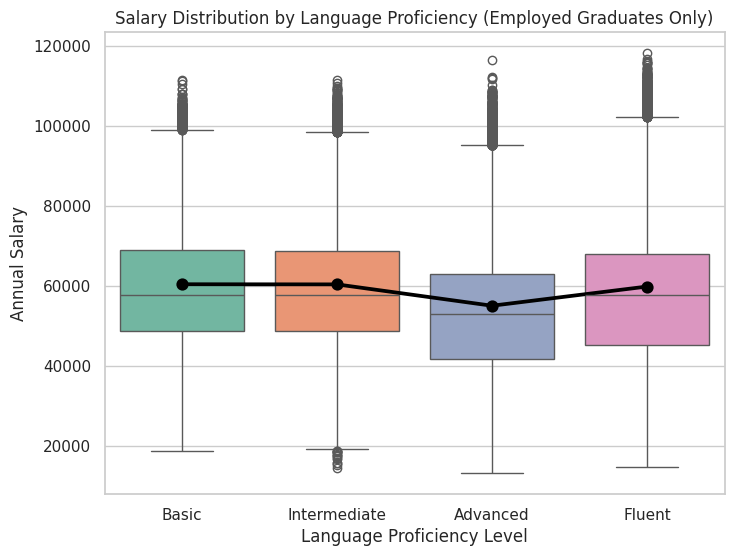

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desired order of categories
order = ['Basic', 'Intermediate', 'Advanced', 'Fluent']

plt.figure(figsize=(8,6))

# Apply the 'order' parameter to the boxplot
sns.boxplot(
    data=df_salary,
    x='Language_Proficiency',
    y='Salary',
    palette='Set2',
    order=order  # <--- Use the defined order list here
)

# Apply the 'order' parameter to the pointplot (must match the boxplot's order)
sns.pointplot(
    data=df_salary,
    x='Language_Proficiency',
    y='Salary',
    color='black',
    estimator='mean',
    ci=None,
    order=order  # <--- Use the defined order list here
)

plt.title('Salary Distribution by Language Proficiency (Employed Graduates Only)')
plt.ylabel('Annual Salary')
plt.xlabel('Language Proficiency Level')
plt.show()




# **Salary by Education Level**

## **Filter the datset**




In [ ]:
# 🔹 Filter dataset to include only employed graduates with valid salaries
df_employed = df[(df['Employment_Status'] == 'Employed') & (df['Salary'] > 0)]

In [ ]:
# 2️⃣ Salary by Education Level
model_edu = ols('Salary ~ C(Education_Level)', data=df_employed).fit()
anova_edu = sm.stats.anova_lm(model_edu, typ=2)
print("Education Level ANOVA\n", anova_edu, "\n")

Education Level ANOVA
                           sum_sq        df             F  PR(>F)
C(Education_Level)  4.348936e+13       3.0  320257.04614     0.0
Residual            7.090318e+12  156640.0           NaN     NaN 



# **Tukey**

In [ ]:
# 🔹 Post-hoc Tukey HSD test
tukey_edu = pairwise_tukeyhsd(
    endog=df_employed['Salary'],
    groups=df_employed['Education_Level'],
    alpha=0.05
)
print(tukey_edu)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------------
Bachelor's  Diploma -8961.2412   0.0  -9154.779 -8767.7035   True
Bachelor's Master's 16129.7771   0.0 16022.9829 16236.5713   True
Bachelor's      PhD 45142.8418   0.0  45013.201 45272.4827   True
   Diploma Master's 25091.0183   0.0 24906.4538 25275.5827   True
   Diploma      PhD 54104.0831   0.0 53905.4231  54302.743   True
  Master's      PhD 29013.0648   0.0 28897.2463 29128.8833   True
-----------------------------------------------------------------


# **Visualization**

/tmp/ipython-input-3364818122.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipython-input-3364818122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


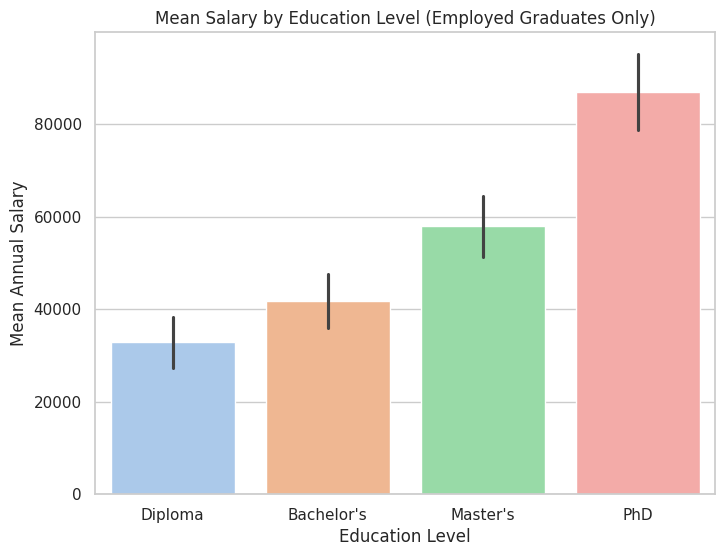

In [ ]:
# 🔹 Visualisation — Mean Salary by Education Level (Ordered)
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_employed,
    x='Education_Level',
    y='Salary',
    estimator='mean',
    ci='sd',
    palette='pastel',
    order=['Diploma', "Bachelor's", "Master's", 'PhD']  # logical academic order
)
plt.title('Mean Salary by Education Level (Employed Graduates Only)')
plt.ylabel('Mean Annual Salary')
plt.xlabel('Education Level')
plt.show()


# **Salary by Internship Experience**

## **Filter the datset**




In [ ]:
# 3️⃣ Salary by Internship Experience
model_int = ols('Salary ~ C(Internship_Experience)', data=df_employed).fit()
anova_int = sm.stats.anova_lm(model_int, typ=2)
print("Internship Experience ANOVA\n", anova_int, "\n")

Internship Experience ANOVA
                                 sum_sq        df           F         PR(>F)
C(Internship_Experience)  2.492254e+11       1.0  775.656801  2.763961e-170
Residual                  5.033045e+13  156642.0         NaN            NaN 



# **Tukey Not Applicable**

##### *Only applicable if Internship_Experience has more than 2 categories (e.g., “None,” “1 Internship,” “Multiple”).*
##### *If it’s just “Yes/No,” Tukey isn’t needed (a simple t-test covers that).*

# **Visualisation**

/tmp/ipython-input-3023794647.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_employed, x='Internship_Experience', y='Salary', estimator='mean', ci='sd', palette='muted')
/tmp/ipython-input-3023794647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_employed, x='Internship_Experience', y='Salary', estimator='mean', ci='sd', palette='muted')


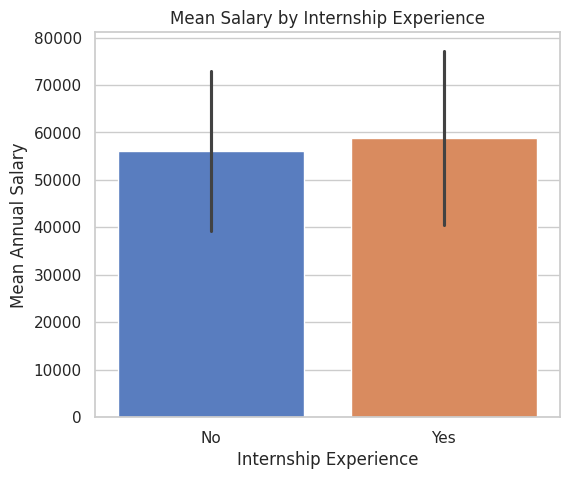

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(data=df_employed, x='Internship_Experience', y='Salary', estimator='mean', ci='sd', palette='muted')
plt.title('Mean Salary by Internship Experience')
plt.ylabel('Mean Annual Salary')
plt.xlabel('Internship Experience')
plt.show()


/tmp/ipython-input-1975518759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df_employed, x='Language_Proficiency', y='Salary', palette='Set2')
/tmp/ipython-input-1975518759.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[1], data=df, x='Education_Level', y='Salary', estimator='mean', ci='sd', palette='pastel')
/tmp/ipython-input-1975518759.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=df, x='Education_Level', y='Salary', estimator='mean', ci='sd', palette='pastel')
/tmp/ipython-input-1975518759.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` f

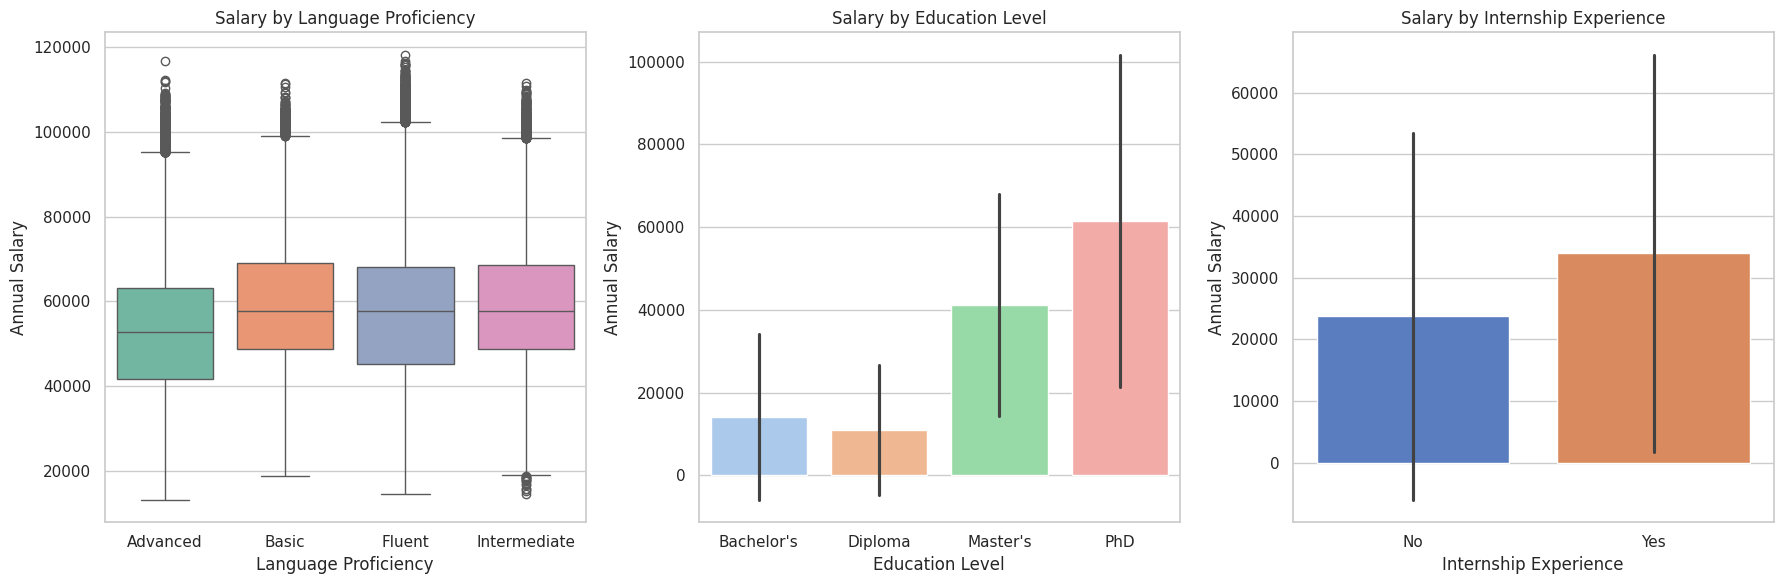

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.boxplot(ax=axes[0], data=df_employed, x='Language_Proficiency', y='Salary', palette='Set2')
axes[0].set_title('Salary by Language Proficiency')
axes[0].set_xlabel('Language Proficiency')

sns.barplot(ax=axes[1], data=df, x='Education_Level', y='Salary', estimator='mean', ci='sd', palette='pastel')
axes[1].set_title('Salary by Education Level')
axes[1].set_xlabel('Education Level')

sns.barplot(ax=axes[2], data=df, x='Internship_Experience', y='Salary', estimator='mean', ci='sd', palette='muted')
axes[2].set_title('Salary by Internship Experience')
axes[2].set_xlabel('Internship Experience')

for ax in axes:
    ax.set_ylabel('Annual Salary')

plt.tight_layout()
plt.show()


# **Two Way Anova**

### **Salary, Education_Level, Internship_Experience**

In [ ]:
model_two = ols('Salary ~ C(Education_Level) * C(Internship_Experience)', data=df_employed).fit()
anova_two = sm.stats.anova_lm(model_two, typ=2)
print(anova_two)


                                                   sum_sq        df  \
C(Education_Level)                           4.394461e+13       3.0   
C(Internship_Experience)                     7.044707e+11       1.0   
C(Education_Level):C(Internship_Experience)  6.243312e+10       3.0   
Residual                                     6.323415e+12  156636.0   

                                                         F  PR(>F)  
C(Education_Level)                           362847.586092     0.0  
C(Internship_Experience)                      17450.298967     0.0  
C(Education_Level):C(Internship_Experience)     515.505971     0.0  
Residual                                               NaN     NaN  


# **Tukey**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# 1. Create a combined interaction group variable
# FIX: Use .astype(str) to convert Categorical columns to strings before concatenating.
df_employed['Interaction_Group'] = (
    df_employed['Education_Level'].astype(str) +
    '-' +
    df_employed['Internship_Experience'].astype(str)
)

# 2. Perform the Tukey HSD test on the Interaction_Group
# You must use the original data frame (df_employed) and the response variable (Salary)
tukey_results = pairwise_tukeyhsd(
    endog=df_employed['Salary'],
    groups=df_employed['Interaction_Group'],
    alpha=0.05
)

# 3. Print the results
print(tukey_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1         group2       meandiff  p-adj    lower      upper    reject
-----------------------------------------------------------------------------
 Bachelor's-No Bachelor's-Yes   3097.0841   0.0   2871.8658  3322.3025   True
 Bachelor's-No     Diploma-No  -8642.6638   0.0  -9087.7647 -8197.5629   True
 Bachelor's-No    Diploma-Yes  -5975.3783   0.0  -6270.9981 -5679.7585   True
 Bachelor's-No    Master's-No  15229.0502   0.0  14994.8868 15463.2137   True
 Bachelor's-No   Master's-Yes  19942.4109   0.0  19728.2539 20156.5679   True
 Bachelor's-No         PhD-No  42607.5319   0.0  42329.6538   42885.41   True
 Bachelor's-No        PhD-Yes  49633.6837   0.0  49398.2379 49869.1294   True
Bachelor's-Yes     Diploma-No -11739.7479   0.0 -12153.8509 -11325.645   True
Bachelor's-Yes    Diploma-Yes  -9072.4624   0.0  -9318.9527 -8825.9721   True
Bachelor's-Yes    Master's-No  12131.9661   0.0  11964.0408 1229

/tmp/ipython-input-3348429326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_employed['Interaction_Group'] = (


/tmp/ipython-input-3249027308.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(


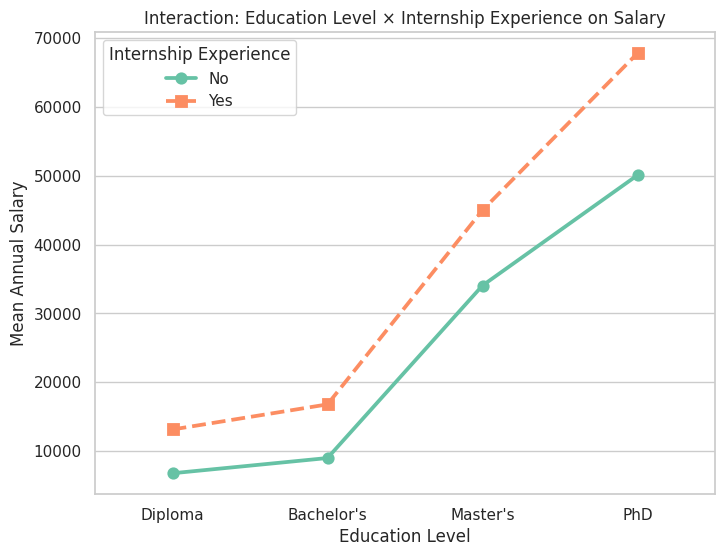

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Interaction plot: Education Level × Internship Experience on Salary
plt.figure(figsize=(8,6))
sns.pointplot(
    data=df,
    x='Education_Level',
    y='Salary',
    hue='Internship_Experience',
    estimator='mean',
    ci=None,
    markers=['o', 's'],
    linestyles=['-', '--'],
    palette='Set2',
    order=['Diploma', "Bachelor's", "Master's", 'PhD']  # ensures logical academic order
)

plt.title('Interaction: Education Level × Internship Experience on Salary')
plt.ylabel('Mean Annual Salary')
plt.xlabel('Education Level')
plt.legend(title='Internship Experience')
plt.show()


## **Salary, Education_Level,Language_Proficiency**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Two-way ANOVA: Education Level × Language Proficiency → Salary
model_edu_lang = ols('Salary ~ C(Education_Level) * C(Language_Proficiency)', data=df_employed).fit()
anova_edu_lang = sm.stats.anova_lm(model_edu_lang, typ=2)
print(anova_edu_lang)


                                                  sum_sq        df  \
C(Education_Level)                          4.312995e+13       3.0   
C(Language_Proficiency)                     6.279487e+11       3.0   
C(Education_Level):C(Language_Proficiency)  5.974226e+10       9.0   
Residual                                    6.402627e+12  156628.0   

                                                        F         PR(>F)  
C(Education_Level)                          351697.194627   0.000000e+00  
C(Language_Proficiency)                       5120.519994   0.000000e+00  
C(Education_Level):C(Language_Proficiency)     162.386648  1.149965e-307  
Residual                                              NaN            NaN  


# **Tukey**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd # Necessary if not already imported

# Assuming df_employed is your DataFrame

# 1. Create a combined interaction group variable
# FIX: Convert the Categorical columns to strings using .astype(str) before concatenating
df_employed['Interaction_Group'] = (
    df_employed['Education_Level'].astype(str) +
    '-' +
    df_employed['Language_Proficiency'].astype(str)
)

# 2. Perform the Tukey HSD test on the Salary using the combined Interaction_Group
tukey_results_edu_lang = pairwise_tukeyhsd(
    endog=df_employed['Salary'],
    groups=df_employed['Interaction_Group'],
    alpha=0.05  # Standard significance level
)

# 3. Print the formatted results
print(tukey_results_edu_lang)

/tmp/ipython-input-4094709528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_employed['Interaction_Group'] = (


                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
         group1                  group2           meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------------------------------------
    Bachelor's-Advanced        Bachelor's-Basic   1534.7028    0.0   1137.1049   1932.3007   True
    Bachelor's-Advanced       Bachelor's-Fluent   3559.7835    0.0    3307.412   3812.1551   True
    Bachelor's-Advanced Bachelor's-Intermediate   1621.7019    0.0   1282.7336   1960.6702   True
    Bachelor's-Advanced        Diploma-Advanced  -8643.1981    0.0  -9001.8161    -8284.58   True
    Bachelor's-Advanced           Diploma-Basic  -7573.4334    0.0  -8339.3659  -6807.5009   True
    Bachelor's-Advanced          Diploma-Fluent  -5896.7023    0.0  -6320.8434  -5472.5613   True
    Bachelor's-Advanced    Diploma-Intermediate  -7210.5956    0.0  -7833.1628  -6588.0284   True
    Bachelor's-Advan

/tmp/ipython-input-366471152.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(


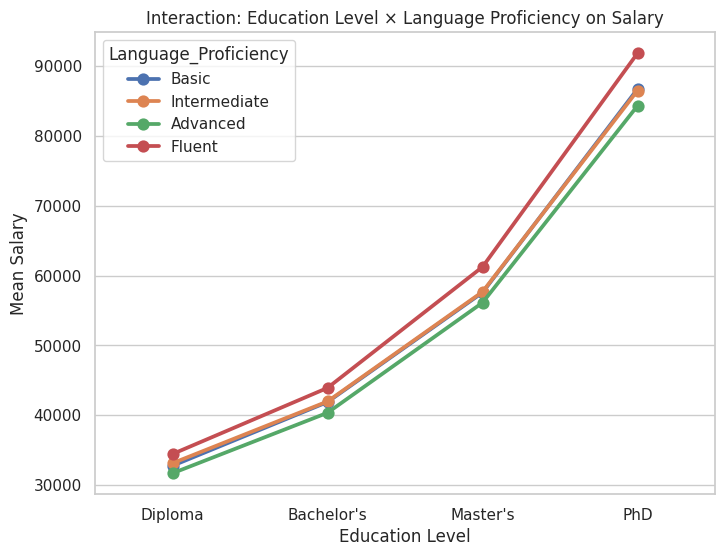

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desired order for the X-axis categories (Education Level)
education_order = ['Diploma', 'Bachelor\'s', 'Master\'s', 'PhD']

# Define the desired order for the Hue categories (Language Proficiency)
# This order ensures the lines/colors follow a logical progression
language_order = ['Basic', 'Intermediate', 'Advanced', 'Fluent']

plt.figure(figsize=(8,6))
sns.pointplot(
    data=df_employed,
    x='Education_Level',
    y='Salary',
    hue='Language_Proficiency',
    order=education_order,   # <--- Applies order to the X-axis
    hue_order=language_order, # <--- Applies order to the legend/lines
    ci=None
)

plt.title('Interaction: Education Level × Language Proficiency on Salary')
plt.ylabel('Mean Salary')
plt.xlabel('Education Level')
plt.show()